In [1]:
# inspired by twitter
# plot the difference in votes by country
# using a face representation

# data source - https://townhall.com/election/2016/president/
# collated by https://github.com/tonmcg/County_Level_Election_Results_12-16/blob/master/2016_US_County_Level_Presidential_Results.csv



In [34]:

# load the data and grab the iowa portion

import pandas as pd
import urllib.request

url = 'https://raw.githubusercontent.com/tonmcg/County_Level_Election_Results_12-16/master/2016_US_County_Level_Presidential_Results.csv'
#response = urllib.request.urlopen(url)
#data = response.read()      # a `bytes` object
#text = data.decode('utf-8') # a `str`; this step can't be used if data is binary
DF = pd.read_csv(url)

drop_idxs = []
for idx,abbr in enumerate(DF['state_abbr']):
    if not(abbr=='IA'):
        drop_idxs.append(idx)
        
DF = DF.drop(drop_idxs)
DF = DF.reset_index(drop=True)

for header in DF:
    print(header)

print(DF.head)



Unnamed: 0
votes_dem
votes_gop
total_votes
per_dem
per_gop
diff
per_point_diff
state_abbr
county_name
combined_fips
<bound method NDFrame.head of     Unnamed: 0  votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
0          550     1127.0     2456.0       3759.0  0.299814  0.653365   1,329   
1          551      565.0     1393.0       2082.0  0.271374  0.669068     828   
2          552     2409.0     4072.0       6837.0  0.352348  0.595583   1,663   
3          553     1813.0     4031.0       6096.0  0.297408  0.661253   2,218   
4          554     1079.0     2135.0       3379.0  0.319325  0.631844   1,056   
5          555     4672.0     8226.0      13690.0  0.341271  0.600877   3,554   
6          556    32006.0    27382.0      63221.0  0.506256  0.433116   4,624   
7          557     5517.0     7458.0      13984.0  0.394522  0.533324   1,941   
8          558     5349.0     7199.0      13350.0  0.400674  0.539251   1,850   
9          559     3966.0     5504.0      10

In [57]:
# get the point spread for each county and add it as a pandas column

signed_diff = []
for idx,row in DF.iterrows():
    signed_diff.append( DF.iloc[idx]['votes_dem'] - DF.iloc[idx]['votes_gop'] )
    
DF['signed_difference'] = signed_diff # can't just use the diff column b/c it's not signed

print(DF.iloc[0])

Unnamed: 0                    550
votes_dem                    1127
votes_gop                    2456
total_votes                  3759
per_dem                  0.299814
per_gop                  0.653365
diff                        1,329
per_point_diff             35.36%
state_abbr                     IA
county_name          Adair County
combined_fips               19001
difference_code             -1329
signed_difference           -1329
Name: 0, dtype: object


In [79]:
# county name to signed_difference
import string 
translator = str.maketrans('', '', string.punctuation)

county2diff= {}
for idx,name in DF['county_name'].iteritems():
    county_name = name
    county_name = county_name[:-7] # pick off ' County' postfix
    county_name = county_name.translate(translator)# normalize text
    county_name = county_name.lower() # all lower case
    county2diff[county_name] = (DF.iloc[idx]['signed_difference'])
print(county2diff)

{'adair': -1329.0, 'adams': -828.0, 'allamakee': -1663.0, 'appanoose': -2218.0, 'audubon': -1056.0, 'benton': -3554.0, 'black hawk': 4624.0, 'boone': -1941.0, 'bremer': -1850.0, 'buchanan': -1538.0, 'buena vista': -2044.0, 'butler': -2755.0, 'calhoun': -2070.0, 'carroll': -3322.0, 'cass': -2809.0, 'cedar': -1697.0, 'cerro gordo': -1743.0, 'cherokee': -2512.0, 'chickasaw': -1475.0, 'clarke': -1243.0, 'clay': -3624.0, 'clayton': -2073.0, 'clinton': -1170.0, 'crawford': -2623.0, 'dallas': -3626.0, 'davis': -1745.0, 'decatur': -1095.0, 'delaware': -2732.0, 'des moines': -1301.0, 'dickinson': -3692.0, 'dubuque': -610.0, 'emmet': -1765.0, 'fayette': -1925.0, 'floyd': -1194.0, 'franklin': -1663.0, 'fremont': -1442.0, 'greene': -1131.0, 'grundy': -2669.0, 'guthrie': -1883.0, 'hamilton': -1735.0, 'hancock': -2390.0, 'hardin': -2457.0, 'harrison': -2769.0, 'henry': -2867.0, 'howard': -937.0, 'humboldt': -2313.0, 'ida': -1863.0, 'iowa': -2123.0, 'jackson': -1984.0, 'jasper': -3448.0, 'jefferson':

In [90]:
# plot the counties

import geopandas as gp

data_path = 'data/iowa counties/county.shp'
shapes = gp.GeoDataFrame.from_file(data_path)

signed_diff_ordered = []
for idx,this_county in shapes['COUNTY'].iteritems():
    name_key = this_county.lower()
    signed_diff_ordered.append(county2diff[name_key])

shapes['signed_difference'] = signed_diff_ordered # add column
for col in shapes:
    print(col)
print(shapes['signed_difference'])

AREA
PERIMETER
COUNTY_
COUNTY_ID
CO_NUMBER
CO_FIPS
ACRES_SF
ACRES
FIPS
COUNTY
ST
geometry
signed_difference
0     -4271.0
1     -1976.0
2     -3692.0
3     -1765.0
4     -1663.0
5     -3108.0
6       -94.0
7      -937.0
8     -1517.0
9     -1301.0
10     -920.0
11   -12472.0
12    -4421.0
13    -3624.0
14    -1684.0
15    -2390.0
16    -1743.0
17    -1475.0
18    -1194.0
19    -2073.0
20    -1925.0
21    -6781.0
22    -2512.0
23    -2044.0
24    -1730.0
25    -2313.0
26    -1900.0
27    -1850.0
28    -1663.0
29    -2755.0
       ...   
69    -2809.0
70    -2232.0
71    -1329.0
72    -2120.0
73    -4402.0
74    -2670.0
75    -4798.0
76    -5471.0
77    -1417.0
78    -2970.0
79    -2119.0
80     -828.0
81    -2867.0
82      -36.0
83    -1601.0
84    -3119.0
85    -1243.0
86    -1637.0
87    -1582.0
88    -1301.0
89    -1442.0
90    -3074.0
91    -1353.0
92    -1067.0
93    -1681.0
94    -1745.0
95    -1095.0
96    -1350.0
97    -2218.0
98    -2567.0
Name: signed_difference, Length: 99, d

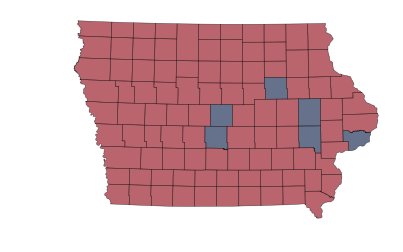

In [91]:
# color state districts based on vote record 
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()

for idx,diff in shapes['signed_difference'].iteritems():
    
    district_id = shapes.loc[idx,'COUNTY']
    try:
        if diff > 0:
            plot_color = 'xkcd:navy'
        elif diff < 0:
            plot_color = 'xkcd:crimson'
        else:
            plot_color = 'xkcd:plum'

        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)
        
    except Exception as e: # no data
    
        print(e)        
        plot_color='xkcd:gray' 
        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)

    

#plt.axis('scaled')
plt.axis('off')
plt.savefig('iowa_house_SF359.svg')
plt.show()

In [103]:
# draw an image on the counties based on vote


im_T_path = 'data/iowa counties/trump_icon.jpg'
im_H_path = 'data/iowa counties/hillary icon.jpg'

scale = 10 # pixel width

T_im = plt.imread(im_T_path)
H_im = plt.imread(im_H_path)

plt.figure()
plt.figimage(T_im)
plt.show()



<Figure size 432x288 with 0 Axes>